In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train_droped.csv')

In [3]:
column_titles = train.columns.tolist()
print(column_titles)
len(column_titles)

['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z', 'tGravityAcc-entropy()-X', 'tGravityAc

363

In [4]:
test = pd.read_csv('test_droped.csv')
test

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,...,-0.917883,-0.909829,-0.890165,-0.898022,-0.234815,-0.720009,0.276801,-0.057978,2,STANDING
1,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,...,-0.949922,-0.986902,-0.951977,-0.951255,-0.431053,-0.698091,0.281343,-0.083898,2,STANDING
2,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,...,-0.986857,-0.989609,-0.985689,-0.986148,-0.809976,-0.702771,0.280083,-0.079346,2,STANDING
3,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,-0.568512,-0.799116,0.848305,...,-0.988566,-0.992021,-0.985562,-0.984015,-0.849081,-0.698954,0.284114,-0.077108,2,STANDING
4,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,-0.560831,-0.825894,0.849179,...,-0.992653,-0.992505,-0.990498,-0.986376,-0.895847,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,-0.160309,-0.131106,0.354922,...,-0.698564,-0.770173,-0.601424,-0.536164,0.365783,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,-0.035922,-0.131106,0.414650,...,-0.662435,-0.947627,-0.566344,-0.534418,0.402907,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,-0.035922,-0.172677,0.402517,...,-0.619598,-0.930426,-0.592331,-0.633343,0.364393,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,-0.106078,-0.172677,0.357500,...,-0.695836,-0.785712,-0.679711,-0.636292,0.238363,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


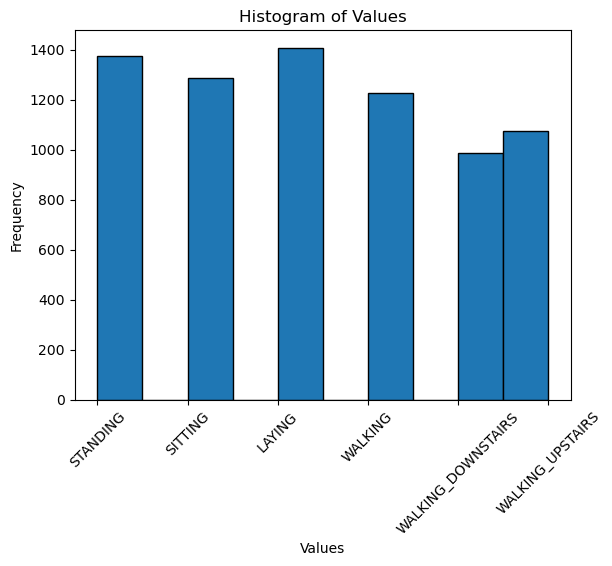

In [5]:
plt.hist(train['Activity'], edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Histogram of Values')
plt.show()

In [6]:
activities = ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

<div style="font-size: 30px;">
Preproccesing
</div>

In [7]:
from sklearn.utils import resample

class_counts = train['Activity'].value_counts()
print("Distribution before undersampling:")
print(class_counts)

target_count = class_counts.min()

undersampled_trains = []
for category in class_counts.index:
    category_df = train[train['Activity']== category]
    undersampled_category_df = resample(category_df, replace=False,  n_samples=target_count,random_state=42)  
    undersampled_trains.append(undersampled_category_df)


undersampled_train = pd.concat(undersampled_trains)

undersampled_train = undersampled_train.sample(frac=1, random_state=42).reset_index(drop=True)

new_class_counts = undersampled_train['Activity'].value_counts()
print("Distribution after undersampling:")
print(new_class_counts)


Distribution before undersampling:
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64
Distribution after undersampling:
WALKING_DOWNSTAIRS    986
STANDING              986
WALKING               986
LAYING                986
SITTING               986
WALKING_UPSTAIRS      986
Name: Activity, dtype: int64


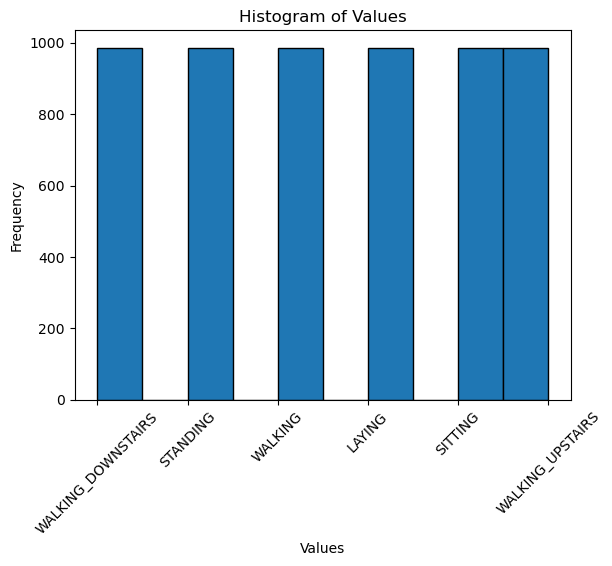

In [8]:
plt.hist(undersampled_train['Activity'], edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Histogram of Values')
plt.show()

In [9]:
final_train = undersampled_train

In [10]:
train_df = pd.read_csv('train_droped.csv')
test_df = pd.read_csv('test_droped.csv')

X_train = final_train.drop(columns=['Activity'])
y_train = final_train['Activity']

X_test = test_df.drop(columns=['Activity'])
y_test = test_df['Activity']

<div style="font-size: 30px;">
kNN
</div>

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters found:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance'}


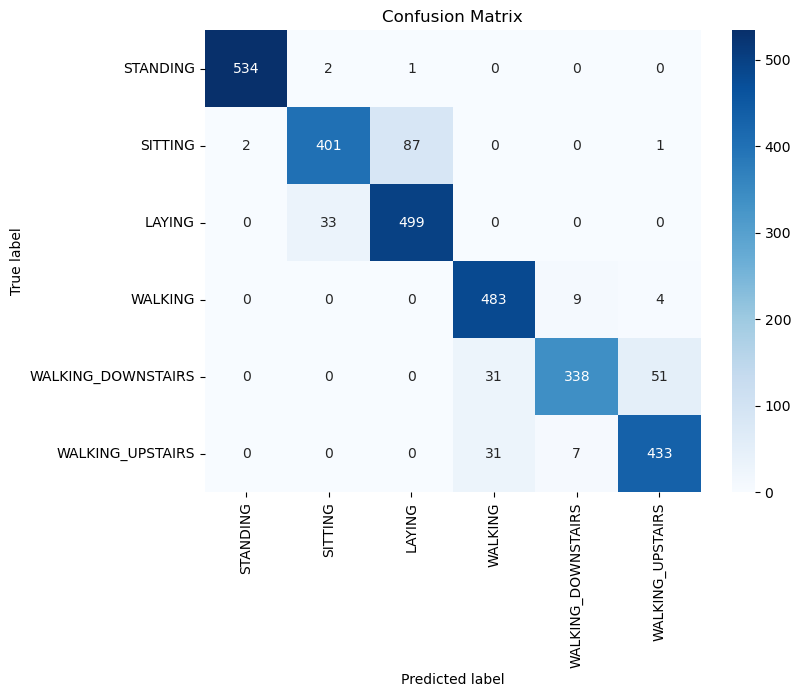

Accuracy: 0.9121140142517815
Recall: 0.9078261275756004
Precision: 0.9154333284714156
F1 score: 0.9092977603507179


In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': np.arange(1, 21), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g',xticklabels= activities, yticklabels=activities)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

<div style="font-size: 30px;">
Random Forest
</div>

Fitting 3 folds for each of 80 candidates, totalling 240 fits


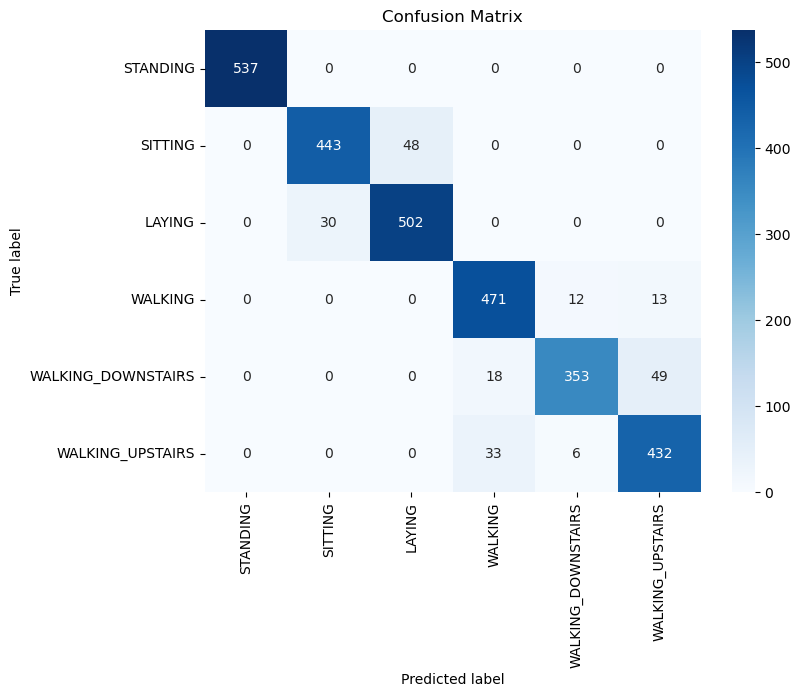

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
Accuracy: 0.9290804207668816
Recall: 0.925519960886835
Precision: 0.9295962638443301
F1 score: 0.9267033497560614


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300], #nuber of trees
    'max_features': ['sqrt', 'log2'], #number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30], #max depth of tree
    'criterion': ['gini', 'entropy'] #quality of split
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_matrix, index=activities, columns=activities)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Best parameters found: ", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

<div style="font-size: 30px;">
SVM
</div>

Fitting 3 folds for each of 144 candidates, totalling 432 fits


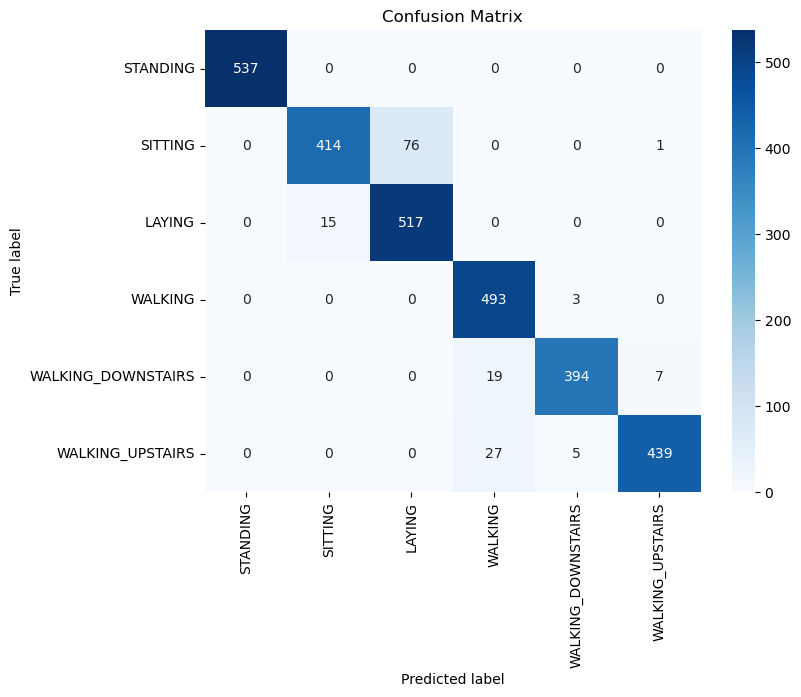

Best parameters found:  {'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9480827960637936
Recall: 0.9465146666115071
Precision: 0.9522887098163405
F1 score: 0.947805433463158


In [13]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], #curvature of boundary
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1,2, 3, 4, 5, 6] 
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_matrix, index=activities, columns=activities)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Best parameters found: ", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

Epoch 1/100, Loss: 1.0487252383618741
Epoch 2/100, Loss: 0.4715255885510831
Epoch 3/100, Loss: 0.2952790076265464
Epoch 4/100, Loss: 0.22106866071353087
Epoch 5/100, Loss: 0.17765839673780107
Epoch 6/100, Loss: 0.15244370346536507
Epoch 7/100, Loss: 0.13465002326143755
Epoch 8/100, Loss: 0.12020513279413855
Epoch 9/100, Loss: 0.1102031178873133
Epoch 10/100, Loss: 0.10291850459132645
Epoch 11/100, Loss: 0.09492153483065399
Epoch 12/100, Loss: 0.09037512129525076
Epoch 13/100, Loss: 0.08674126188900019
Epoch 14/100, Loss: 0.08224787060674783
Epoch 15/100, Loss: 0.07737108787672745
Epoch 16/100, Loss: 0.07486607731898894
Epoch 17/100, Loss: 0.07261889516753522
Epoch 18/100, Loss: 0.07092083673924207
Epoch 19/100, Loss: 0.068444817042532
Epoch 20/100, Loss: 0.06421582625323051
Epoch 21/100, Loss: 0.06303313540143742
Epoch 22/100, Loss: 0.06065855491654696
Epoch 23/100, Loss: 0.05914202142204787
Epoch 24/100, Loss: 0.05873637764362266
Epoch 25/100, Loss: 0.05603354359171479
Epoch 26/100, L

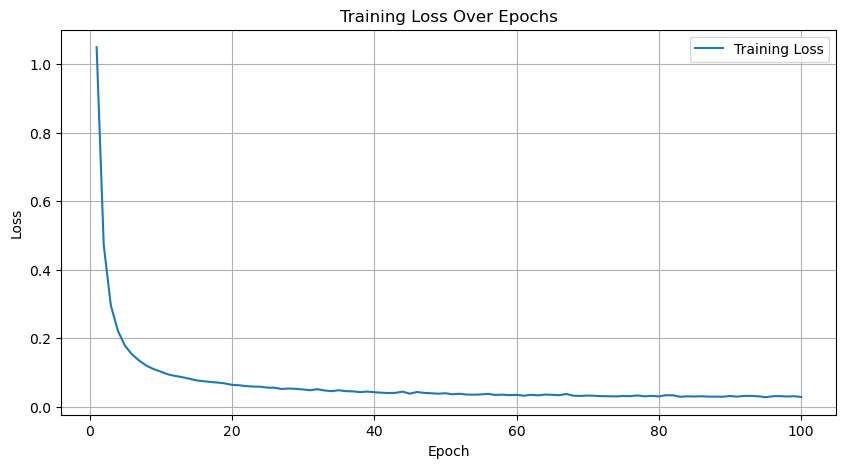

Accuracy: 0.9514760773668137
Recall: 0.951221182020706
Precision: 0.9539386045423924
F1 score:  0.9525779552852685


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

input_dim = X_train.shape[1]
output_dim = len(label_encoder.classes_)

model = nn.Sequential(
    nn.Linear(input_dim, 64),
    nn.Linear(64, 128),
    nn.Linear(128, 32),
    nn.Linear(32, output_dim)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 100
epoch_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

correct = sum(1 for true, pred in zip(all_labels, all_predictions) if true == pred)
accuracy = correct / len(all_labels)

recall = recall_score(all_labels, all_predictions, average='macro')
precision = precision_score(all_labels, all_predictions, average='macro')
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score: ', f1)

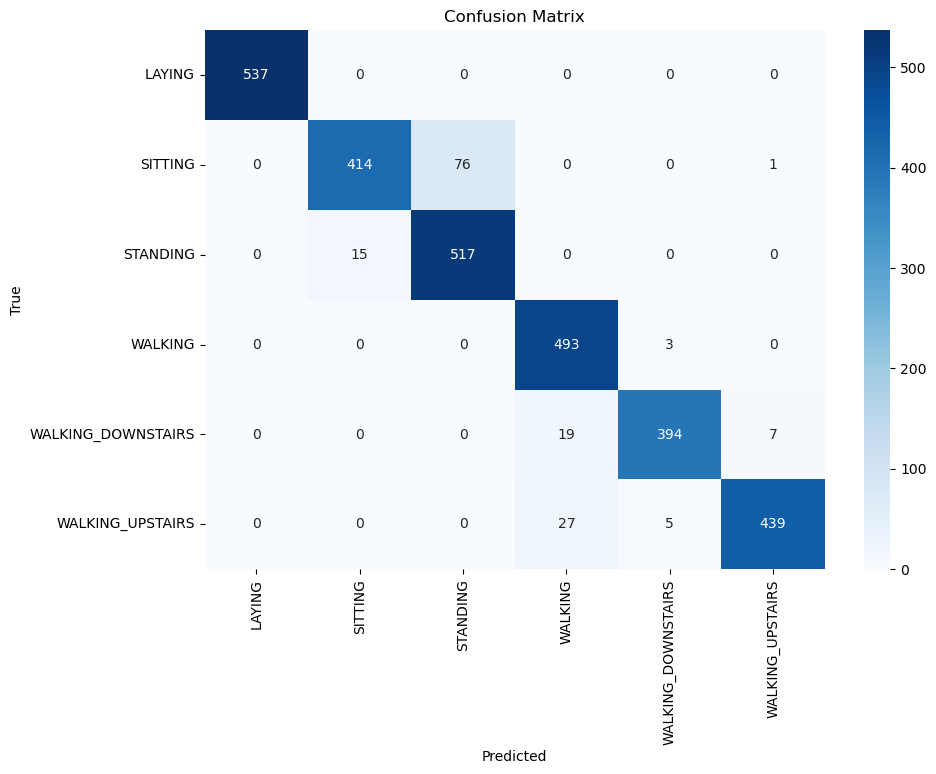

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()